# Time series forecasting

# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Bitcoin price historical data

In [2]:
data = pd.read_csv('bitcoin-price-historical data.csv', header = None)
data.columns = ['MONTHS','PRICE']
data = data.set_index('MONTHS') #setting the MONTHs column as index
data.head(10)
data.tail(10)

,PRICE
MONTHS,
22,739.0
23,966.6
24,966.2
25,1189.1
26,1081.7
27,1435.2
28,2191.8
29,2420.7
30,2856.0


# Time series analysis

## Plot time series data

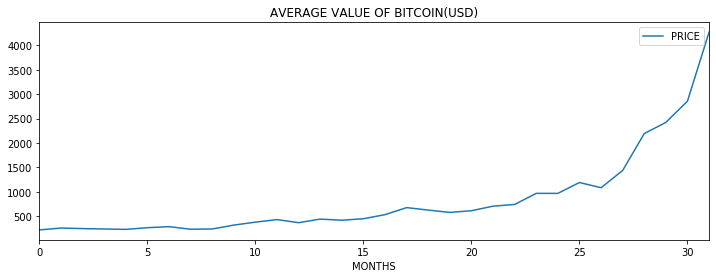

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('AVERAGE VALUE OF BITCOIN(USD)')
plt.show(block=False)

In [4]:
data.isnull().sum()   #there are no missing values

PRICE    0
dtype: int64

# Build and evaluate time series forecast

## Split time series data into training and test set

In [5]:
train_len = 29
train = data[0:train_len] # first 29 months as training set
test = data[train_len:]# last 3 months test set
print(train)
print(test)

         PRICE
MONTHS        
0        217.4
1        255.7
2        244.3
3        236.1
4        228.7
5        262.9
6        284.5
7        231.4
8        236.5
9        316.0
10       376.9
11       429.0
12       365.5
13       439.2
14       416.0
15       446.6
16       530.7
17       674.7
18       623.7
19       576.2
20       611.1
21       704.1
22       739.0
23       966.6
24       966.2
25      1189.1
26      1081.7
27      1435.2
28      2191.8
         PRICE
MONTHS        
29      2420.7
30      2856.0
31      4268.8


# Simple time series methods

## Naive method

In [6]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['PRICE'][train_len-1]
print(y_hat_naive['naive_forecast'] )

MONTHS
29    2191.8
30    2191.8
31    2191.8
Name: naive_forecast, dtype: float64


### Plot train, test and forecast

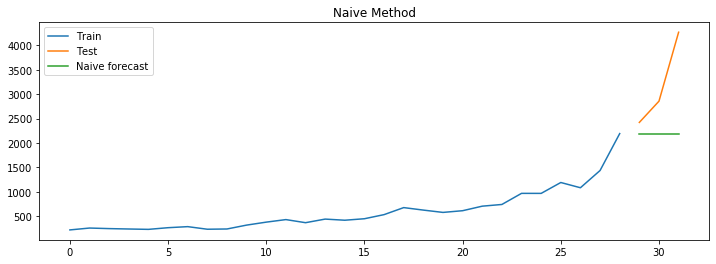

In [7]:
plt.figure(figsize=(12,4))
plt.plot(train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [8]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_naive['naive_forecast'])/test['PRICE'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


## Simple average method

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['PRICE'].mean()
print(y_hat_avg['avg_forecast'])

MONTHS
29    595.751724
30    595.751724
31    595.751724
Name: avg_forecast, dtype: float64


### Plot train, test and forecast

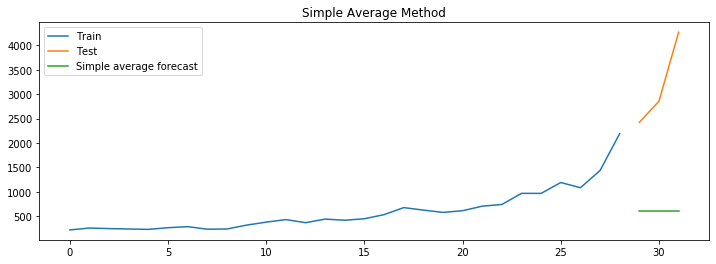

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [11]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_avg['avg_forecast'])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


## Simple moving average method

In [12]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['PRICE'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

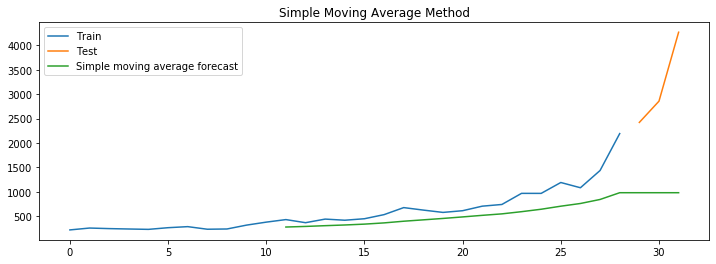

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [14]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_sma['sma_forecast'][train_len:])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42


# Exponential smoothing methods

## Simple exponential smoothing

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['PRICE'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
print(y_hat_ses['ses_forecast'])

MONTHS
29    2191.8
30    2191.8
31    2191.8
Name: ses_forecast, dtype: float64


### Plot train, test and forecast

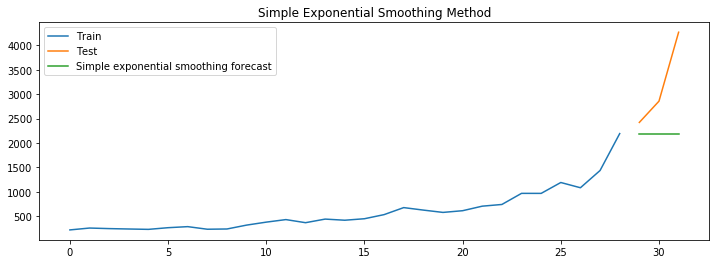

In [16]:
plt.figure(figsize=(12,4))
plt.plot(train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

# Calculate RMSE and MAPE

In [17]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_ses['ses_forecast'])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple exponential smoothing forecast,1265.90,27.12


## Holt's method with trend

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['PRICE']), trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.4216689816104592, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68630825041842, 'initial_slope': 13.712946700068688, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

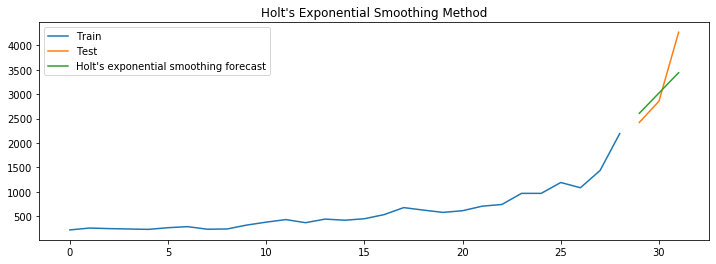

In [19]:
plt.figure(figsize=(12,4))
plt.plot( train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [20]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_holt['holt_forecast'])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01


## Holt Winters' additive method with trend and seasonality

In [21]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['PRICE']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999966296118, 'smoothing_slope': 0.4158840347660917, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.4835559832011, 'initial_slope': 1.141586351102969, 'initial_seasons': array([-340.14176737, -301.86534664, -319.2290442 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ajay.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

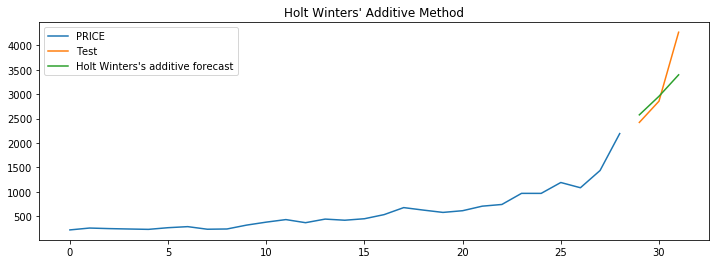

In [22]:
plt.figure(figsize=(12,4))
plt.plot( train['PRICE'], label='PRICE')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [23]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_hwa['hw_forecast'])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01
0,Holt Winters' additive method,515.11,10.12


## Holt Winter's multiplicative method with trend and seasonality

In [24]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['PRICE']) ,seasonal_periods=3,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.3159217878524853, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.5299998376623, 'initial_slope': 1.1444444468674946, 'initial_seasons': array([0.40269202, 0.46254117, 0.41789625]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ajay.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

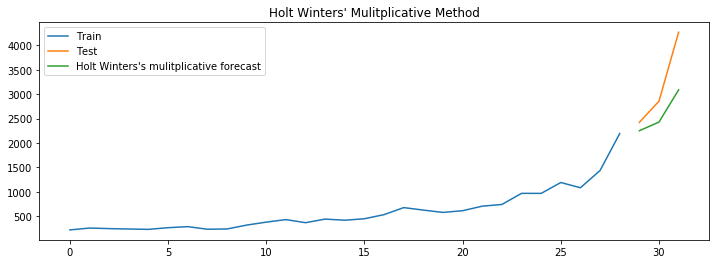

In [25]:
plt.figure(figsize=(12,4))
plt.plot( train['PRICE'], label='Train')
plt.plot(test['PRICE'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [26]:
rmse = np.sqrt(mean_squared_error(test['PRICE'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['PRICE']-y_hat_hwm['hw_forecast'])/test['PRICE'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01
0,Holt Winters' additive method,515.11,10.12
0,Holt Winters' multiplicative method,731.90,16.57
